In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
%matplotlib inline

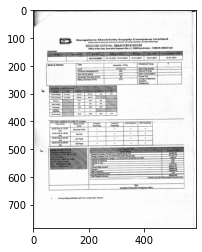

In [2]:
image_path = r"E:\Nitin\RVCE\Projects\PDF-OCR\annotation_tool\images\samples\BESCOM\BESCOM-Dec-2020.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')
new_img = img.copy()

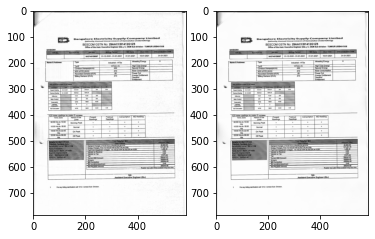

True

In [24]:
dst = cv2.fastNlMeansDenoising(img,None,10,7,21)

plt.subplot(121),plt.imshow(img,cmap='gray')
plt.subplot(122),plt.imshow(dst,cmap='gray')
plt.show()

cv2.imwrite('./images/samples/BESCOM/results/de_noised.jpg',dst)

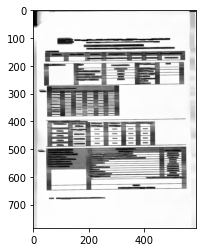

In [20]:
kernel = np.ones((1,5), np.uint8) 

dilation_kernel = np.ones((1,3), np.uint8) 
image_dilation = cv2.dilate(dst, kernel, iterations=1) 
img_erosion = cv2.erode(dst, kernel, iterations=4) 

plt.imshow(img_erosion,cmap='gray')
plt.show()

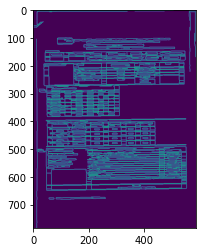

In [22]:
# Find Canny edges 
edged = cv2.Canny(img_erosion, 30, 200) 

  
# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
new_img = img.copy()  
plt.imshow(edged)
cv2.imwrite('./images/samples/BESCOM/results/canny.jpg',edged)

True

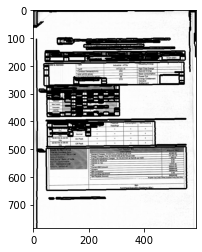

In [23]:
cv2.drawContours(new_img, contours, -1, (0, 255, 0), 3)
plt.imshow(new_img,cmap='gray')

cv2.imwrite('./images/samples/BESCOM/results/contour.jpg',new_img)

In [ ]:
def find_nearest(point,contours):
    points = []
    cnts = []
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        points.append([x,y])
        cnts.append([x,y,w,h])

    points = np.array(points)

    dist_2 = np.sum((points - point)**2, axis=1)
    nearest_contour_index = np.argmin(dist_2)
    nearest_contour = points[nearest_contour_index]

    c = cnts[nearest_contour_index]

    new_img = img.copy()
    x1 = c[0]
    y1 = c[1]
    x2 = x1 + c[2]
    y2 = y1 + c[3]
    color = (0, 255, 255) 
    cv2.rectangle(new_img,(x1,y1),(x2,y2),color,5)
    plt.imshow(new_img,cmap='gray')

# Extract text

In [31]:
def extract_text(contours,img):
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        x1 = x
        x2 = x1 + w
        y1 = y
        y2 = y1 + h
        sub_img = img[y1:y2,x1:x2]

        plt.imshow(sub_img,cmap='gray')
        plt.show()

        text = pytesseract.image_to_string(sub_img)
        print(text)

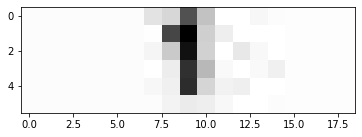

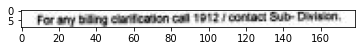

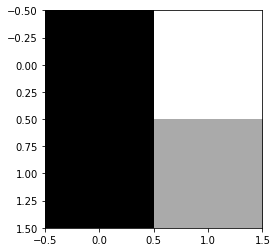

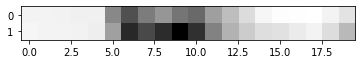

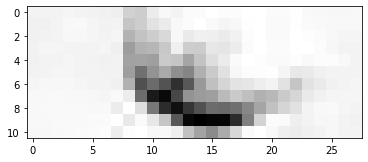

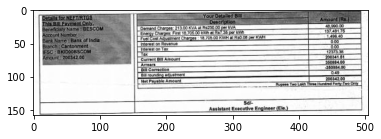

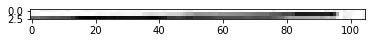

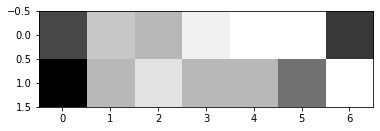

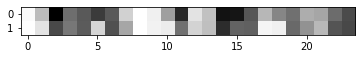

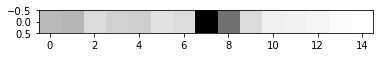

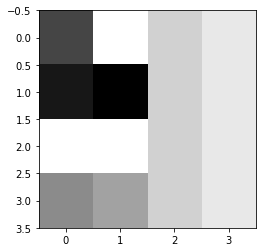

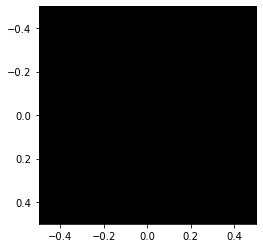

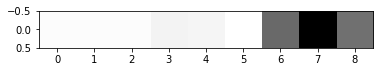

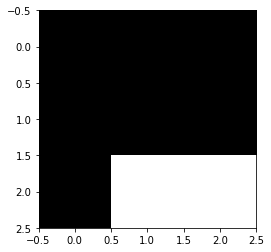

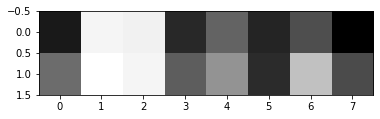

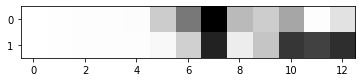

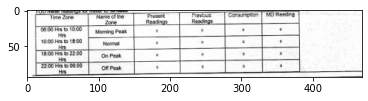

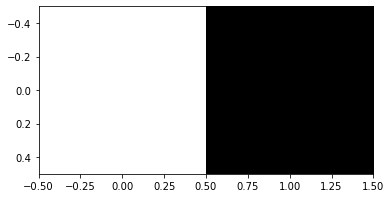

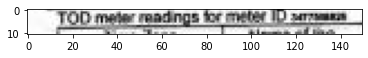

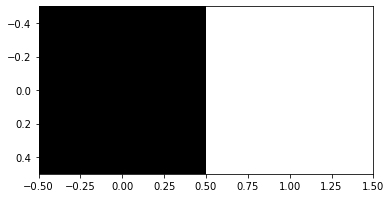

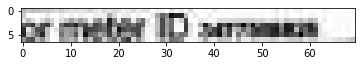

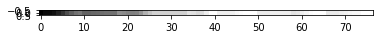

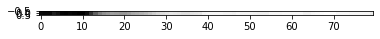

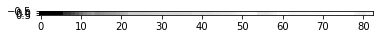

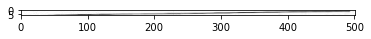

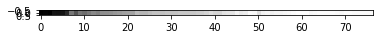

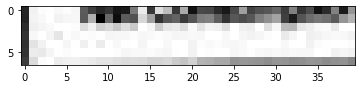

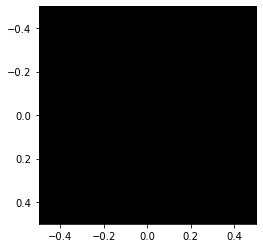

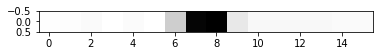

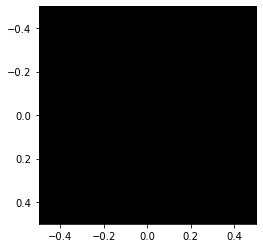

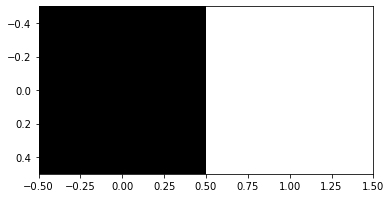

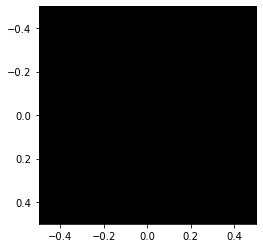

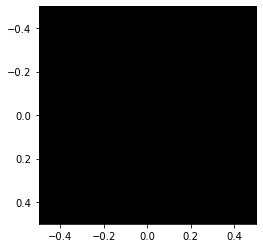

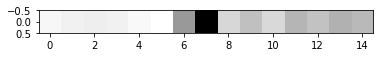

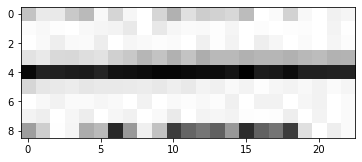

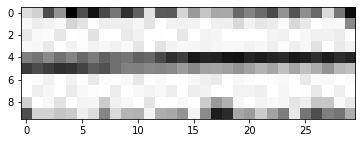

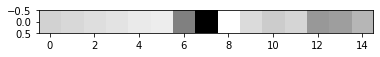

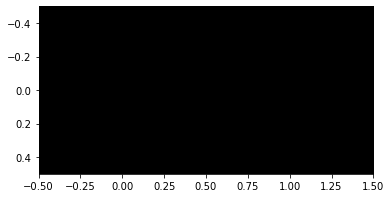

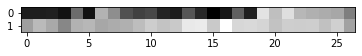

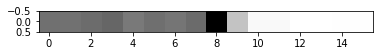

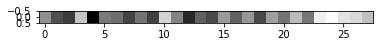

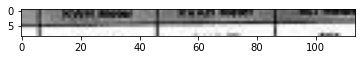

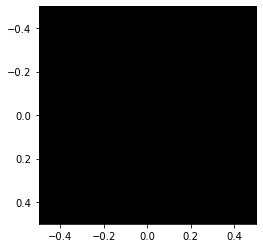

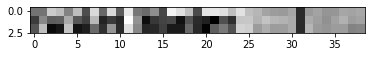

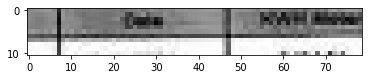

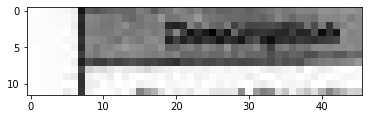

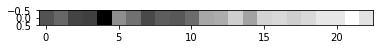

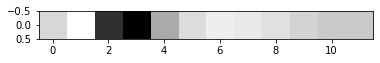

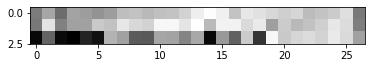

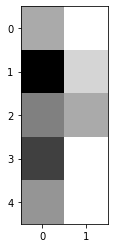

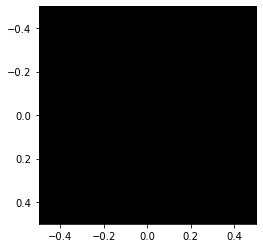

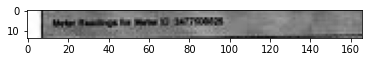

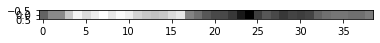

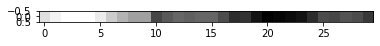

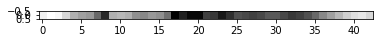

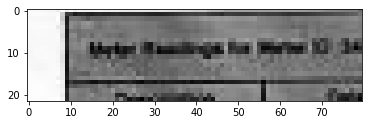

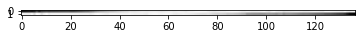

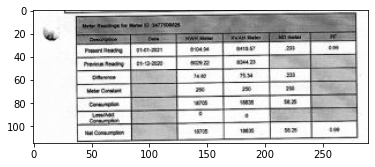

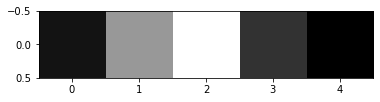

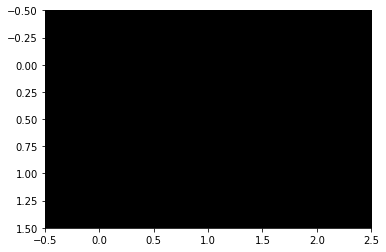

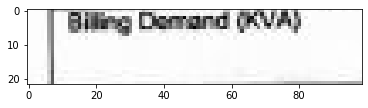

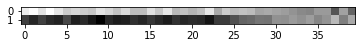

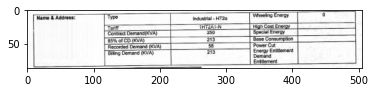

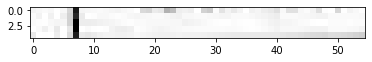

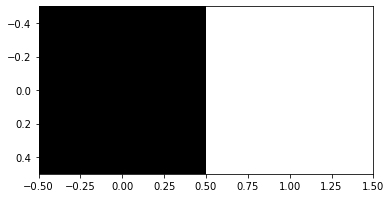

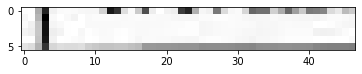

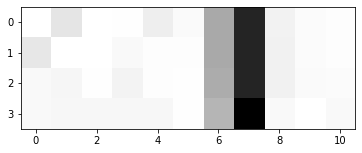

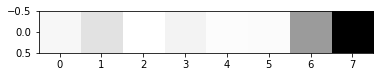

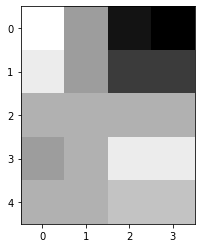

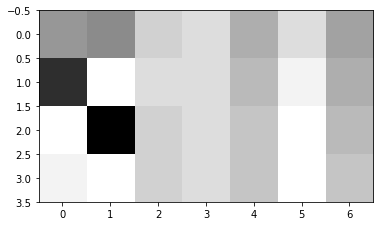

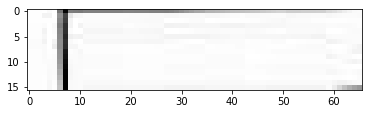

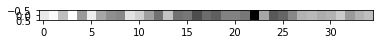

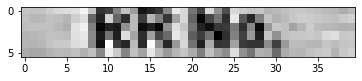

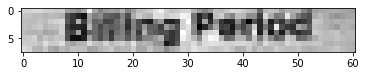

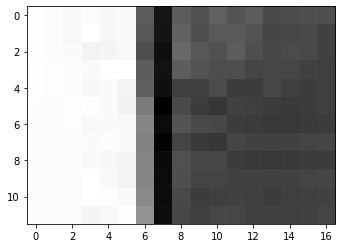

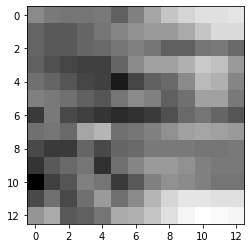

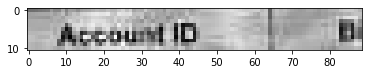

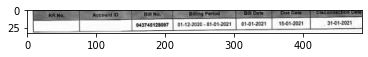

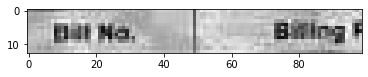

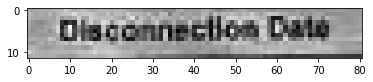

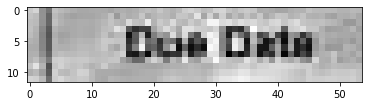

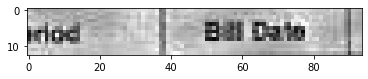

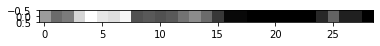

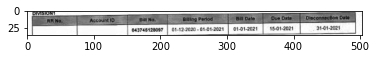

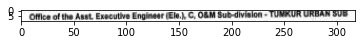

Office of the Asset. Executive Engineer (Ele,), C. O8M Sub-division - TUMKUR URBAN SUB —



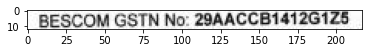

BESCOM GSTN No: 29AACCB1412G1Z5



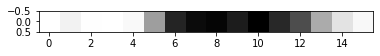

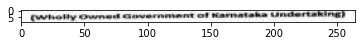

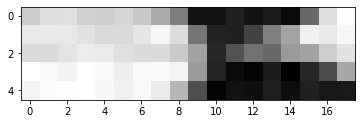

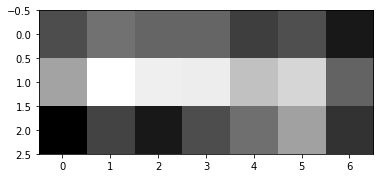

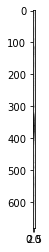

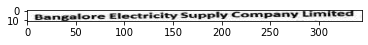

tlangetore Electricity Supply Company Limited

 



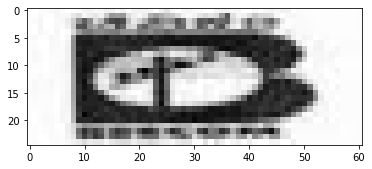

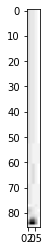

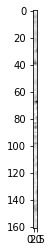

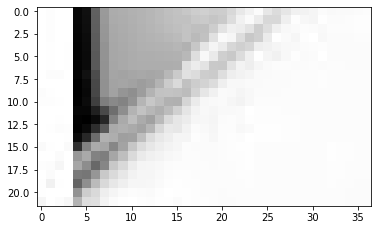

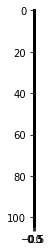

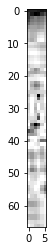

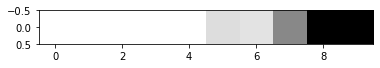

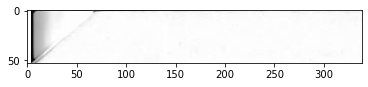

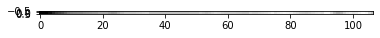

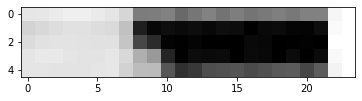

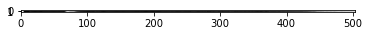

In [32]:
extract_text(contours,img)